<a href="https://colab.research.google.com/github/SofiMich/CE/blob/main/T4_CE_Michaelian_ParidadPar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de paridad par sin función XOR
Para este problema vamos a utilizar las compuertas lógicas AND, NOT y OR para simular el resultado de la función de paridad par:


| $A$ | $B$ | $C$ |Paridad
| -------- |:-------:| -----:|-----:|
|0 |0 |0| 1|
|0 |0 |1| 0|
|0 |1 |0| 0|
|0 |1 |1| 1|
|1 |0 |0| 0|
|1 |0 |1| 1|
|1 |1 |0| 1|
|1 |1 |1| 0|

La esrtuctura de los individuos sera de árboles o listas igadas. En cada nodo puede haber una compuerta lógica o un nodo terminal (0, 1, A, B, C).


In [ ]:
import numpy as np
import pandas as pd
import math
import random

In [ ]:
def AND(x,y):
  return int(x and y)

def OR(x,y):
  return int(x or y)

def NOT(x):
  return int(not x)

def XOR(x,y):
  return int((not x and y) or (x and not y))

A, B, C = 0, 1, 1

In [ ]:
XOR(0,0)

0

In [ ]:
funciones = {
  '&' : AND,
  '^' : OR,
  '!' : NOT
}

funcionesx = {
  '&' : AND,
  '^' : OR,
  '!' : NOT,
  'x': XOR
}


arguments = {
  '&' : 2,
  '^' : 2,
  '!' : 1,
  'x': 2
}

terminals = {
  '0' : 0,
  '1' : 1,
  'A' : A,
  'B' : B,
  'C' : C
}

In [ ]:
A = 0
B = 1
C = 0

In [ ]:
def seleccionarOp(individuo, nNodos,  nMaxNodos, nFunc, nMaxFunc, nArg, listaFunc, listaTerms):
  if ((nNodos < nMaxNodos) and (nArg > 0)):
    #print(nNodos)
    r = random.randint(1,10)
    #print(r)

    if ((r <= 5) and (nFunc < nMaxFunc)):
      #print('Seleccionando función')
      token = np.random.choice(listaFunc)
      nArg = nArg + arguments[token]
      nFunc = nFunc + 1
      
    else:
      #print('Seleccionando terminal')
      token = np.random.choice(listaTerms)

    nNodos = nNodos + 1
    nArg = nArg - 1
    individuo.append(token)
    #print(nNodos, token, nArg)

    if ((nNodos < nMaxNodos) and (nArg > 0)):
      seleccionarOp(individuo, nNodos,  nMaxNodos, nFunc, nMaxFunc, nArg, listaFunc, listaTerms)
    
  return individuo

In [ ]:
def crearIndividuo(nMaxNodos, listaFunc, listaTerms):
  individuo = []
  nMaxFunc = nMaxNodos/2 - 1
  nNodos = 0
  nFunc = 0
  nArg = 1
  indivuduo = seleccionarOp(individuo, nNodos,  nMaxNodos, nFunc, nMaxFunc, nArg, listaFunc, listaTerms)
  l = len(individuo)
  n = nMaxNodos - len(individuo)
  ceros = ['0']*n
  individuo = individuo + ceros
  return individuo, l

In [ ]:
def crearPoblacion(nInd, nMaxNodos, listaFunc, listaTerms):
  pob = []
  l = []
  for i in range(nInd):
    individuo, l = crearIndividuo(nMaxNodos, listaFunc, listaTerms)
    pob.append([individuo, l, 0])
  return pob

In [ ]:
paridad = {
    '000' : 1,
    '001' : 0,
    '010' : 0,
    '011' : 1,
    '100' : 0,
    '101' : 1,
    '110' : 1,
    '111' : 0
}

In [ ]:
def parse(tokens, terminals, functions):
  if (len(tokens)) > 0:
    token = tokens.pop(0)
    #print(token)
    if token in functions:
        #print('functions')
        if arguments[token] == 1:
          #print('1 arg')
          return functions[token](parse(tokens, terminals, functions))
        elif arguments[token] == 2:
          #print('2 args')
          return functions[token](parse(tokens, terminals, functions), parse(tokens, terminals, functions))
    else:
        #print('terminal')
        return terminals[token]
  else:
    return 1

In [ ]:
def evaluarIndividuo(individuo, objetivo, functions):
  error = 0
  for key in objetivo:
    y_expected = objetivo[key]
    A, B, C = tuple(map(int, tuple(key)))
    terminales = {
    '0' : 0,
    '1' : 1,
    'A' : A,
    'B' : B,
    'C' : C
    }
    l = individuo[1]
    #print(l)
    if l > 0:
      #print(individuo[0][0:l])
      tokens = individuo[0][0:l]
      #print(key)
      y = parse(tokens, terminales, functions)
    else:
      y = 0
    error = error + abs(y-y_expected)
  error = error / len(objetivo)
  individuo[-1] = error
  #print('ya lo evalué')
  #print(individuo)
  return individuo, error

In [ ]:
def evaluarPoblacion(pob, objetivo, functions):
  #print('evaluar pob')
  x = np.zeros(len(pob))
  for i in range(len(pob)):
    pob[i], x[i] = evaluarIndividuo(pob[i], objetivo, functions)
  return pob, x

### Calcular Fitness

In [ ]:
def calcularFitness(pob):
  #print('calcularF')
  total = np.sum(pob, axis = 0)[-1]
  for i in range(len(pob)):
    pob[i][-1] = pob[i][-1] / (total + np.nextafter(0,1))
  return pob

### Calcular probabilidad de selección

In [ ]:
def calcularPS(x):
  #print('calcularPS')
  total = np.sum(x, axis = 0)[-1]
  
  for i in x:
    if i[-1]/total >= 0:
        i[-1] = i[-1]/total
    else:
        print('Probabilidad negativa!!!')
        print(i)
        i[-1] = np.nextafter(0,1)
  return x

### Seleccionar individuos para el pool de cruza

In [ ]:
def seleccionarRuleta(pob):
  #print('seleccionarRuleta')
  pool = []
  pob = calcularFitness(pob)
  proba = np.zeros(len(pob))
  for i in range(len(pob)):
    proba[i] = pob[i][-1]
    
  for i in range(len(pob)):
    r = np.random.choice(range(len(pob)), p = proba)
    pool.append(pob[r][0:2])
  return pool

In [ ]:
def seleccionarTorneo(pob):
  #print('seleccionarTorneo')
  pool = []

  for i in range(len(pob)):
    j = random.choice(range(len(pob)))
    k = random.choice(range(len(pob)))
    if pob[j][-1] <= pob[k][-1]:
      pool.append(pob[j][0:2])
    else:
      pool.append(pob[k][0:2])
  return pool

In [ ]:
random.randint(0,1)

0

### Cruza

In [ ]:
def cruzar(pool, pc):
  #print('cruzar')
  nuevaGen = []

  l = len(pool[0][0])

  for i in range(len(pool)//2):
    
    padre1 = pool[2*i][0]
    l1 = pool[2*i][1]

    padre2 = pool[2*i+1][0]
    l2 = pool[2*i+1][1]

    r = random.uniform(0,1)

    if r <= pc:
      
      n1 = random.randint(0,l1-1)
      n2 = random.randint(0,l2-1)
      
      f1 = n1+(l2-n2)
      f2 = n2+(l1-n1)

      if (f1 <= l) and (f2 <= l):
        #print('cruzando')

        ceros = ['0']*(l-f1)
        hijo1 = padre1[0:n1]+padre2[n2:l2]+ceros

        ceros = ['0']*(l-f2)
        hijo2 = padre2[0:n2]+padre1[n1:l1]+ceros

      else:
        hijo1 = padre1
        hijo2 = padre2
        f1 = l1
        f2 = l2
    
    else:
      hijo1 = padre1
      hijo2 = padre2
      f1 = l1
      f2 = l2

    #print(hijo1, hijo2)
    nuevaGen.append([hijo1, f1, 0])
    nuevaGen.append([hijo2, f2, 0])

  return nuevaGen
    

### Mutación

In [ ]:
def mutar(nuevaGen, listaFunc, listaTerms, pm = 1):
  #print('mutar')
  l = len(nuevaGen[0][0])
  #print(l)

  for i in range(len(nuevaGen)):
    prob = random.uniform(np.nextafter(0,1),1.0)
    if prob <= pm:
      l1 = nuevaGen[i][1]
      #print(l1)
      n = random.randint(0,l1-1)
      mutacion = crearIndividuo(l-n, listaFunc, listaTerms)
      #print(nuevaGen[i], mutacion, n)
      #ceros = ['0']*(n+)
      nuevaGen[i][0] = nuevaGen[i][0][0:n] + mutacion[0]
      nuevaGen[i][1] = n + mutacion[1]
      #print(nuevaGen[i])
  return nuevaGen

# Elitismo

In [ ]:
def elitismo1(pob, nuevaGen, mejor, functions, objetivo):
  #print('elitismo1')
  #print(mejor)
  retadores = nuevaGen
  retadores, y = evaluarPoblacion(retadores, objetivo, functions)
  indMax = np.where(y == np.max(y))[0][0]
  nuevaGen[indMax] = mejor
  #print(nuevaGen[indMax])
  return nuevaGen

In [ ]:
def elitismoT(pob, nuevaGen, mejor, functions, objetivo):
    #print('elitismoT')
    nInd = len(pob)
    torneo = pob + nuevaGen
    torneo, y = evaluarPoblacion(torneo, objetivo, functions)
    indMin = np.argpartition(y, nInd) 
    j = 0
    for k in range(nInd):
      nuevaGen[k] = (np.array(torneo, dtype=object)[indMin.astype(int)][j]).tolist()
      j = (j + 1)% nInd
    return nuevaGen

# Evolucionar

In [ ]:
def evolucionar(nInd, nMaxNodos, ngeneraciones, pc, pm, objetivo, functions, terminals, seleccionar, elitismo, nombre):
  mejor = []  
  promedio = np.zeros(ngeneraciones)

  listaFunc = list(functions.keys())
  #print(listaFunc)
  listaTerms = list(terminals.keys())

  pob = crearPoblacion(nInd, nMaxNodos, listaFunc, listaTerms)
  #print(pob)

  for i in range(ngeneraciones):

    #print(i)
    pob, x = evaluarPoblacion(pob, objetivo, functions)
    #print(pob)

    indMin = np.where(x == np.min(x))[0][0]
    
    #print(np.where(x == np.min(x))[0][0])
    mejor.append(pob[indMin]) #guardamos al individuo con el mejor desempeño
  
    promedio[i] = np.sum(x) / len(pob) #calculamos el promedio del desempeño de la población

    pool = seleccionar(pob)
    #print(pob)

    nuevaGen = cruzar(pool, pc)
    #print(nuevaGen)

    nuevaGen = mutar(nuevaGen, listaFunc, listaTerms, pm)
    #print(nuevaGen)

    #Elitismo:
    nuevaGen = elitismo(pob, nuevaGen, mejor[i], functions, objetivo)
    #print(nuevaGen)

    pob = nuevaGen

# Graficar
  import matplotlib.pyplot as plt

  plt.axes(xlabel='Generación', ylabel = 'Error')
  plt.title('Desempeño ' + str(nInd) + ' individuos en ' +str(ngeneraciones) + ' generaciones\n '+ nombre)

  mejores, y = evaluarPoblacion(mejor, objetivo, functions)
  plt.plot(promedio)
  plt.plot(y)
  #print(y)

  plt.legend(labels=["Promedio","Mejor individuo"])
  plt.show

  return mejores


In [ ]:
random.seed(42)

In [ ]:
nGen = 100
nInd = 60
pc = 0.7
pm = 0.1
nMaxNodos = 20

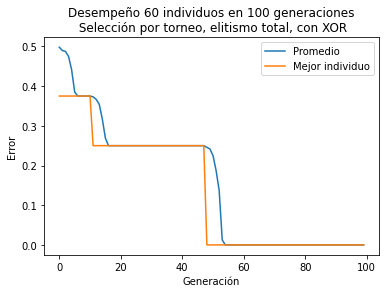

In [ ]:
mejoresX = evolucionar(nInd, nMaxNodos, nGen, pc, pm, paridad, funcionesx, terminals, seleccionarTorneo, elitismoT, 'Selección por torneo, elitismo total, con XOR')

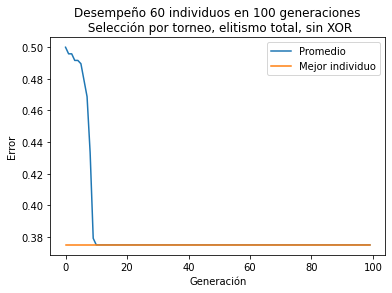

In [ ]:
mejoresX = evolucionar(nInd, nMaxNodos, nGen, pc, pm, paridad, funciones, terminals, seleccionarTorneo, elitismoT, 'Selección por torneo, elitismo total, sin XOR')

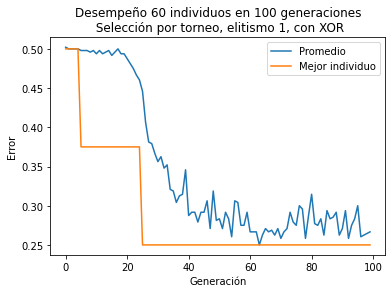

In [ ]:
mejoresX = evolucionar(nInd, nMaxNodos, nGen, pc, pm, paridad, funcionesx, terminals, seleccionarTorneo, elitismo1, 'Selección por torneo, elitismo 1, con XOR')

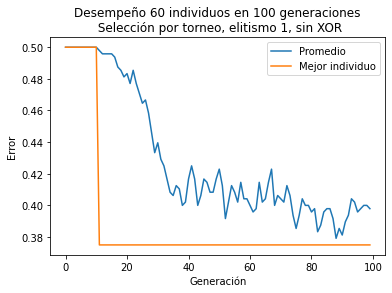

In [ ]:
mejoresX = evolucionar(nInd, nMaxNodos, nGen, pc, pm, paridad, funciones, terminals, seleccionarTorneo, elitismo1, 'Selección por torneo, elitismo 1, sin XOR')